<a href="https://colab.research.google.com/github/cavalcanteprofissional/Estudo-de-Caso-sobre-Turismo-e-Aprendizado-de-M-quina/blob/main/Estudo_de_Caso_sobre_Turismo_e_Aprendizado_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importa√ß√£o de bibliotecas

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from io import StringIO
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error, r2_score)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split)

# Etapas do Trabalho: Estudo de Caso sobre Turismo e Aprendizado de M√°quina

# 1. Defini√ß√£o do Escopo do Projeto:
* Escolher uma regi√£o espec√≠fica do Brasil para an√°lise: **A Regi√£o Nordeste do Brasil**.
* Delimitar os objetivos do estudo, como entender padr√µes de fluxo de turistas e identificar fatores que afetam o turismo: **Predi√ß√£o de Regi√µes Tur√≠sticas Promissoras**.

# 2. Coleta de Dados:
* Identifica√ß√£o de Fontes de Dados:
  * Pesquisar e selecionar fontes confi√°veis de dados sobre
turismo, como dados do IBGE, secretarias de turismo
estaduais, e plataformas de dados abertos.

In [ ]:
# URLs dos datasets relevantes
urls = {
    "CHEGADA_2009": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/942e84f4-93e7-406f-8314-e860cd1d80d3/download/chegadas_2009.csv",
    "CHEGADA_2010": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/44cee3ac-a507-49c1-9320-20ecdb7353c1/download/chegadas_2010.csv",
    "CHEGADA_2011": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/410f90a1-7287-4487-a8a3-142f8c37d87c/download/chegadas_2011.csv",
    "CHEGADA_2012": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/ec9c41a2-6b1e-46b3-a93f-f46e0adfc2d7/download/chegadas_2012.csv",
    "CHEGADA_2013": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/97dbba8c-2c8e-4055-baae-6361c3ba2e79/download/chegadas_2013.csv",
    "CHEGADA_2014": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/669597f4-217f-4762-ab47-80c17238ce64/download/chegadas_2014.csv",
    "CHEGADA_2015": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/e0e4ffa2-fab1-4a06-a5a5-3b8986a1a331/download/chegadas_2015.csv",
    "CHEGADA_2016": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/7a04c1d4-482d-4359-b04e-0907b6407c08/download/chegadas_2016.csv",
    "CHEGADA_2017": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/86134fdc-fbfe-44d0-ad2e-315b16f70233/download/chegadas_2017.csv",
    "CHEGADA_2018": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/7495cab5-6597-4015-95ec-d161d756ee41/download/chegadas_2018.csv",
    "CHEGADA_2019": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/24057369-a5dc-45b4-a66f-9a6a8f8e3422/download/chegadas_2019.csv",
    "CHEGADA_2020": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/92e6e604-156f-4e69-830b-9c34abcd14cb/download/chegadas_2020.csv",
    "CHEGADA_2021": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/21f188c3-5d93-4124-ae5c-135490a26acf/download/chegadas_2021.csv",
    "CHEGADA_2022": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/8df14749-5e61-4887-90d0-c9ad7af3a14c/download/chegadas_2022.csv",
    "CHEGADA_2023": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/24761490-6668-4a55-84a6-994d0e9cf84d/download/chegadas_2023.csv",
    "CHEGADA_2024": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/a1336a87-2458-4034-bc13-fb4e3523db2f/download/chegadas_2024.csv"
}

# Fun√ß√£o para baixar e carregar CSVs
def load_csv_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Verifica se a requisi√ß√£o foi bem-sucedida
        return pd.read_csv(StringIO(response.text), encoding='utf-8', sep=';')
    except requests.exceptions.RequestException as e:
        print(f"Erro ao baixar {url}: {e}")
        return None

# Carregar todos os datasets
datasets_chegadas = {name: load_csv_from_url(url) for name, url in urls.items()}

# Verificar se os datasets foram carregados corretamente
for name, df in datasets_chegadas.items():
    if df is not None:
        print(f"Dataset {name} carregado com sucesso! Shape: {df.shape}")
    else:
        print(f"Falha ao carregar o dataset {name}.")

Dataset CHEGADA_2009 carregado com sucesso! Shape: (22176, 12)
Dataset CHEGADA_2010 carregado com sucesso! Shape: (22176, 12)
Dataset CHEGADA_2011 carregado com sucesso! Shape: (22176, 12)
Dataset CHEGADA_2012 carregado com sucesso! Shape: (22848, 12)
Dataset CHEGADA_2013 carregado com sucesso! Shape: (20832, 12)
Dataset CHEGADA_2014 carregado com sucesso! Shape: (27552, 12)
Dataset CHEGADA_2015 carregado com sucesso! Shape: (46872, 12)
Dataset CHEGADA_2016 carregado com sucesso! Shape: (44640, 12)
Dataset CHEGADA_2017 carregado com sucesso! Shape: (43524, 12)
Dataset CHEGADA_2018 carregado com sucesso! Shape: (46872, 12)
Dataset CHEGADA_2019 carregado com sucesso! Shape: (49104, 12)
Dataset CHEGADA_2020 carregado com sucesso! Shape: (47988, 12)
Dataset CHEGADA_2021 carregado com sucesso! Shape: (55800, 12)
Dataset CHEGADA_2022 carregado com sucesso! Shape: (54684, 12)
Dataset CHEGADA_2023 carregado com sucesso! Shape: (34764, 12)
Dataset CHEGADA_2024 carregado com sucesso! Shape: (228

In [ ]:
# Exibir cabe√ßalho dos datasets para an√°lise
for name, df in datasets_chegadas.items():
    print(f"Cabe√ßalho do dataset {name}:")
    display(df.head())

Cabe√ßalho do dataset CHEGADA_2009:


Continente  Ordem continente           Pa√≠s  Ordem pa√≠s        UF  Ordem UF  \
0     √Åfrica                 1  √Åfrica do Sul           2  Amazonas         4   
1     √Åfrica                 1         Angola           6  Amazonas         4   
2     √Åfrica                 1     Cabo Verde          35  Amazonas         4   
3     √Åfrica                 1        Nig√©ria         162  Amazonas         4   
4     √Åfrica                 1  Outros pa√≠ses         998  Amazonas         4   

  Via de acesso  Ordem via de acesso   Ano      M√™s  Ordem m√™s  Chegadas  
0         A√©rea                    1  2009  janeiro          1         6  
1         A√©rea                    1  2009  janeiro          1         0  
2         A√©rea                    1  2009  janeiro          1         0  
3         A√©rea                    1  2009  janeiro          1         1  
4         A√©rea                    1  2009  janeiro          1         2

Cabe√ßalho do dataset CHEGADA_2010:


Continente  Ordem continente           Pa√≠s  Ordem pa√≠s        UF  Ordem UF  \
0     √Åfrica                 1  √Åfrica do Sul           2  Amazonas         4   
1     √Åfrica                 1         Angola           6  Amazonas         4   
2     √Åfrica                 1     Cabo Verde          35  Amazonas         4   
3     √Åfrica                 1        Nig√©ria         162  Amazonas         4   
4     √Åfrica                 1  Outros pa√≠ses         998  Amazonas         4   

  Via de acesso  Ordem via de acesso   Ano      M√™s  Ordem m√™s  Chegadas  
0         A√©rea                    1  2010  janeiro          1         3  
1         A√©rea                    1  2010  janeiro          1         1  
2         A√©rea                    1  2010  janeiro          1         0  
3         A√©rea                    1  2010  janeiro          1         0  
4         A√©rea                    1  2010  janeiro          1         0

Cabe√ßalho do dataset CHEGADA_2011:


Continente  Ordem continente           Pa√≠s  Ordem pa√≠s        UF  Ordem UF  \
0     √Åfrica                 1  √Åfrica do Sul           2  Amazonas         4   
1     √Åfrica                 1         Angola           6  Amazonas         4   
2     √Åfrica                 1     Cabo Verde          35  Amazonas         4   
3     √Åfrica                 1        Nig√©ria         162  Amazonas         4   
4     √Åfrica                 1  Outros pa√≠ses         998  Amazonas         4   

  Via de acesso  Ordem via de acesso   Ano      M√™s  Ordem m√™s  Chegadas  
0         A√©rea                    1  2011  janeiro          1         1  
1         A√©rea                    1  2011  janeiro          1         2  
2         A√©rea                    1  2011  janeiro          1         0  
3         A√©rea                    1  2011  janeiro          1         0  
4         A√©rea                    1  2011  janeiro          1         2

Cabe√ßalho do dataset CHEGADA_2012:


Continente  Ordem continente           Pa√≠s  Ordem pa√≠s        UF  Ordem UF  \
0     √Åfrica                 1  √Åfrica do Sul           2  Amazonas         4   
1     √Åfrica                 1         Angola           6  Amazonas         4   
2     √Åfrica                 1     Cabo Verde          35  Amazonas         4   
3     √Åfrica                 1        Nig√©ria         162  Amazonas         4   
4     √Åfrica                 1  Outros pa√≠ses         998  Amazonas         4   

  Via de acesso  Ordem via de acesso   Ano      M√™s  Ordem m√™s  Chegadas  
0         A√©rea                    1  2012  janeiro          1       0.0  
1         A√©rea                    1  2012  janeiro          1       0.0  
2         A√©rea                    1  2012  janeiro          1       0.0  
3         A√©rea                    1  2012  janeiro          1       0.0  
4         A√©rea                    1  2012  janeiro          1       1.0

Cabe√ßalho do dataset CHEGADA_2013:


Continente  Ordem continente           Pa√≠s  Ordem pa√≠s        UF  Ordem UF  \
0     √Åfrica                 1  √Åfrica do Sul           2    Paran√°        16   
1     √Åfrica                 1         Angola           6    Paran√°        16   
2     √Åfrica                 1     Cabo Verde          35    Paran√°        16   
3     √Åfrica                 1        Nig√©ria         162    Paran√°        16   
4     √Åfrica                 1  √Åfrica do Sul           2  Amazonas         4   

  Via de acesso  Ordem via de acesso   Ano      M√™s  Ordem m√™s  Chegadas  
0     Terrestre                    2  2013  janeiro          1       189  
1     Terrestre                    2  2013  janeiro          1       117  
2     Terrestre                    2  2013  janeiro          1         4  
3     Terrestre                    2  2013  janeiro          1         0  
4         A√©rea                    1  2013  janeiro          1         0

Cabe√ßalho do dataset CHEGADA_2014:


Continente  Ordem continente           Pa√≠s  Ordem pa√≠s        UF  Ordem UF  \
0     √Åfrica                 1  √Åfrica do Sul           2  Amazonas         4   
1     √Åfrica                 1         Angola           6  Amazonas         4   
2     √Åfrica                 1     Cabo Verde          35  Amazonas         4   
3     √Åfrica                 1        Nig√©ria         162  Amazonas         4   
4     √Åfrica                 1  Outros pa√≠ses         998  Amazonas         4   

  Via de acesso  Ordem via de acesso   Ano      M√™s  Ordem m√™s  Chegadas  
0         A√©rea                    1  2014  janeiro          1       0.0  
1         A√©rea                    1  2014  janeiro          1       0.0  
2         A√©rea                    1  2014  janeiro          1       0.0  
3         A√©rea                    1  2014  janeiro          1       0.0  
4         A√©rea                    1  2014  janeiro          1       2.0

Cabe√ßalho do dataset CHEGADA_2015:


Continente  Ordem continente           Pa√≠s  Ordem pa√≠s    UF  Ordem UF  \
0     √Åfrica                 1  √Åfrica do Sul           2  Acre         1   
1     √Åfrica                 1         Angola           6  Acre         1   
2     √Åfrica                 1     Cabo Verde          35  Acre         1   
3     √Åfrica                 1          Egito          60  Acre         1   
4     √Åfrica                 1           Gana          77  Acre         1   

  Via de acesso  Ordem via de acesso   ano      M√™s  Ordem m√™s  Chegadas  
0     Terrestre                    2  2015  janeiro          1         2  
1     Terrestre                    2  2015  janeiro          1         0  
2     Terrestre                    2  2015  janeiro          1         0  
3     Terrestre                    2  2015  janeiro          1         0  
4     Terrestre                    2  2015  janeiro          1         0

Cabe√ßalho do dataset CHEGADA_2016:


Continente  cod continente           Pa√≠s  cod pais    UF  cod uf  \
0     √Åfrica               1  √Åfrica do Sul         2  Acre       1   
1     √Åfrica               1         Angola         6  Acre       1   
2     √Åfrica               1     Cabo Verde        35  Acre       1   
3     √Åfrica               1          Egito        60  Acre       1   
4     √Åfrica               1           Gana        77  Acre       1   

         Via  cod via   ano      M√™s  cod mes  Chegadas  
0  Terrestre        2  2016  janeiro        1         1  
1  Terrestre        2  2016  janeiro        1         0  
2  Terrestre        2  2016  janeiro        1         0  
3  Terrestre        2  2016  janeiro        1         2  
4  Terrestre        2  2016  janeiro        1         0

Cabe√ßalho do dataset CHEGADA_2017:


Continente  cod continente           Pa√≠s  cod pais    UF  cod uf  \
0     √Åfrica               1  √Åfrica do Sul         2  Acre       1   
1     √Åfrica               1         Angola         6  Acre       1   
2     √Åfrica               1     Cabo Verde        35  Acre       1   
3     √Åfrica               1          Egito        60  Acre       1   
4     √Åfrica               1           Gana        77  Acre       1   

         Via  cod via   ano      M√™s  cod mes  Chegadas  
0  Terrestre        2  2017  janeiro        1         0  
1  Terrestre        2  2017  janeiro        1         0  
2  Terrestre        2  2017  janeiro        1         0  
3  Terrestre        2  2017  janeiro        1         0  
4  Terrestre        2  2017  janeiro        1         0

Cabe√ßalho do dataset CHEGADA_2018:


Continente  cod continente           Pa√≠s  cod pais    UF  cod uf      Via  \
0     √Åfrica               1  √Åfrica do Sul         2  Acre       1  Fluvial   
1     √Åfrica               1  √Åfrica do Sul         2  Acre       1  Fluvial   
2     √Åfrica               1  √Åfrica do Sul         2  Acre       1  Fluvial   
3     √Åfrica               1  √Åfrica do Sul         2  Acre       1  Fluvial   
4     √Åfrica               1  √Åfrica do Sul         2  Acre       1  Fluvial   

   cod via   ano        M√™s  cod mes  Chegadas  
0        4  2018    janeiro        1         0  
1        4  2018  fevereiro        2         0  
2        4  2018      mar√ßo        3         0  
3        4  2018      abril        4         0  
4        4  2018       maio        5         0

Cabe√ßalho do dataset CHEGADA_2019:


Continente  cod continente           Pa√≠s  cod pais    UF  cod uf    Via  \
0     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
1     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
2     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
3     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
4     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   

   cod via   ano        M√™s  cod mes  Chegadas  
0        1  2019    janeiro        1         0  
1        1  2019  fevereiro        2         0  
2        1  2019      mar√ßo        3         0  
3        1  2019      abril        4         0  
4        1  2019       maio        5         0

Cabe√ßalho do dataset CHEGADA_2020:


Continente  cod continente           Pa√≠s  cod pais    UF  cod uf    Via  \
0     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
1     √Åfrica               1         Angola         6  Acre       1  A√©rea   
2     √Åfrica               1     Cabo Verde        35  Acre       1  A√©rea   
3     √Åfrica               1          Egito        60  Acre       1  A√©rea   
4     √Åfrica               1           Gana        77  Acre       1  A√©rea   

   cod via   ano      M√™s  cod mes  Chegadas  
0        1  2020  janeiro        1         0  
1        1  2020  janeiro        1         0  
2        1  2020  janeiro        1         0  
3        1  2020  janeiro        1         0  
4        1  2020  janeiro        1         0

Cabe√ßalho do dataset CHEGADA_2021:


Continente  cod continente           Pa√≠s  cod pais    UF  cod uf    Via  \
0     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
1     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
2     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
3     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
4     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   

   cod via   ano        M√™s  cod mes  Chegadas  
0        1  2021    janeiro        1         0  
1        1  2021  fevereiro        2         0  
2        1  2021      mar√ßo        3         0  
3        1  2021      abril        4         0  
4        1  2021       maio        5         0

Cabe√ßalho do dataset CHEGADA_2022:


Continente  cod continente           Pa√≠s  cod pais    UF  cod uf    Via  \
0     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
1     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
2     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
3     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   
4     √Åfrica               1  √Åfrica do Sul         2  Acre       1  A√©rea   

   cod via   ano        M√™s  cod mes  Chegadas  
0        1  2022    Janeiro        1         0  
1        1  2022  Fevereiro        2         0  
2        1  2022      mar√ßo        3         0  
3        1  2022      Abril        4         0  
4        1  2022       Maio        5         0

Cabe√ßalho do dataset CHEGADA_2023:


Continente  cod continente           Pa√≠s  cod pais  \
0  Am√©rica do Sul               4           Peru        34   
1  Am√©rica do Sul               4           Peru        34   
2            √Åsia               5  Outros pa√≠ses        56   
3          Europa               6       Alemanha        57   
4          Europa               6       Alemanha        57   

                             UF  cod uf    Via  cod via   ano        M√™s  \
0                          Acre       1  A√©reo        1  2023   Novembro   
1                          Acre       1  A√©reo        1  2023   Novembro   
2  Outras Unidades da Federa√ß√£o      99  A√©reo        1  2023      Junho   
3  Outras Unidades da Federa√ß√£o      99  A√©reo        1  2023    Janeiro   
4  Outras Unidades da Federa√ß√£o      99  A√©reo        1  2023  Fevereiro   

   cod mes  Chegadas  
0       11         0  
1       11         0  
2        6         0  
3        1        12  
4        2        10

Cabe√ßalho do dataset CHEGADA_2024:


Continente  cod continente       Pa√≠s  cod pais  \
0            Europa               6   Alemanha        57   
1    Am√©rica do Sul               4  Argentina        26   
2            Europa               6    B√©lgica        59   
3  Am√©rica do Norte               3     Canad√°        23   
4    Am√©rica do Sul               4      Chile        28   

                             UF  cod uf    Via  cod via   ano      M√™s  \
0  Outras Unidades da Federa√ß√£o      99  A√©rea        1  2024  Janeiro   
1  Outras Unidades da Federa√ß√£o      99  A√©rea        1  2024  Janeiro   
2  Outras Unidades da Federa√ß√£o      99  A√©rea        1  2024  Janeiro   
3  Outras Unidades da Federa√ß√£o      99  A√©rea        1  2024  Janeiro   
4  Outras Unidades da Federa√ß√£o      99  A√©rea        1  2024  Janeiro   

   cod mes  Chegadas  
0        1        10  
1        1      1197  
2        1         3  
3        1         2  
4        1         1

# 3. Limpeza e Prepara√ß√£o dos Dados:

In [ ]:
# Concatenar todos os datasets de chegada em um √∫nico DataFrame
chegada_consolidado = pd.concat(datasets_chegadas.values(), ignore_index=True)

In [ ]:
# Fun√ß√£o para unificar as colunas 'Ano' e 'ano'
def unificar_colunas_Ano(df):
    if 'ano' in df.columns and 'Ano' in df.columns:
        # Preencher valores ausentes em 'Ano' com valores de 'ano'
        df['Ano'] = df['Ano'].fillna(df['ano'])
        # Remover a coluna 'ano' do DataFrame
        df = df.drop(columns=['ano'])
    return df

# Aplicar a fun√ß√£o de unifica√ß√£o
chegada_consolidado = unificar_colunas_Ano(chegada_consolidado)

# Converter a coluna 'Ano' de float para int sem inplace
chegada_consolidado['Ano'] = chegada_consolidado['Ano'].astype(int)

print(chegada_consolidado.dtypes)  # Verificar se a convers√£o foi bem-sucedida

Continente              object
Ordem continente       float64
Pa√≠s                    object
Ordem pa√≠s             float64
UF                      object
Ordem UF               float64
Via de acesso           object
Ordem via de acesso    float64
Ano                      int64
M√™s                     object
Ordem m√™s              float64
Chegadas               float64
cod continente         float64
cod pais               float64
cod uf                 float64
Via                     object
cod via                float64
cod mes                float64
dtype: object


In [ ]:
# Fun√ß√£o para unificar as colunas 'Via de acesso' e 'Via'
def unificar_colunas_Via(df):
    if 'Via de acesso' in df.columns and 'Via' in df.columns:
        # Preencher valores ausentes em 'Via de acesso' com valores de 'Via'
        df['Via de acesso'] = df['Via de acesso'].fillna(df['Via'])
        # Remover a coluna 'Via de acesso' do DataFrame
        df = df.drop(columns=['Via'])
    return df

# Aplicar a fun√ß√£o de unifica√ß√£o
chegada_consolidado = unificar_colunas_Via(chegada_consolidado)

print(chegada_consolidado.dtypes)  # Verificar se a unifica√ß√£o foi bem-sucedida

Continente              object
Ordem continente       float64
Pa√≠s                    object
Ordem pa√≠s             float64
UF                      object
Ordem UF               float64
Via de acesso           object
Ordem via de acesso    float64
Ano                      int64
M√™s                     object
Ordem m√™s              float64
Chegadas               float64
cod continente         float64
cod pais               float64
cod uf                 float64
cod via                float64
cod mes                float64
dtype: object


In [ ]:
# Fun√ß√£o para padronizar os valores na coluna "Via de acesso" no g√™nero feminino
def padronizar_via_acesso(df):
    if 'Via de acesso' in df.columns:
        df['Via de acesso'] = df['Via de acesso'].replace({
            'Mar√≠timo': 'Mar√≠tima',
            'A√©reo': 'A√©rea'
        })
    return df

# Aplicar a fun√ß√£o no dataset
chegada_consolidado = padronizar_via_acesso(chegada_consolidado)

# Verificar os valores √∫nicos ap√≥s a padroniza√ß√£o
print(chegada_consolidado['Via de acesso'].unique())

['A√©rea' 'Mar√≠tima' 'Terrestre' 'Fluvial']


In [ ]:
# Fun√ß√£o para remover colunas que come√ßam com 'cod' ou 'Ord'
def remover_colunas(df):
    # Filtra as colunas que come√ßam com 'cod' ou 'Ord'
    colunas_para_remover = [coluna for coluna in df.columns if coluna.startswith('cod') or coluna.startswith('Ord')]
    # Remove as colunas do DataFrame
    df = df.drop(columns=colunas_para_remover, errors='ignore')
    return df

# Exemplo de uso
chegada_consolidado = remover_colunas(chegada_consolidado)

# Verificar as colunas restantes
print("Colunas no DataFrame ap√≥s remo√ß√£o:", chegada_consolidado.columns)

Colunas no DataFrame ap√≥s remo√ß√£o: Index(['Continente', 'Pa√≠s', 'UF', 'Via de acesso', 'Ano', 'M√™s', 'Chegadas'], dtype='object')


In [ ]:
# Criar um dicion√°rio para mapear os meses em n√∫meros
month_mapping = {
    'Janeiro': 1, 'janeiro': 1,
    'Fevereiro': 2, 'fevereiro': 2,
    'Marco': 3, 'Mar√ßo': 3, 'marco': 3, 'mar√ßo': 3,
    'Abril': 4, 'abril': 4,
    'Maio': 5, 'maio': 5,
    'Junho': 6, 'junho': 6,
    'Julho': 7, 'julho': 7,
    'Agosto': 8, 'agosto': 8,
    'Setembro': 9, 'setembro': 9,
    'Outubro': 10, 'outubro': 10,
    'Novembro': 11, 'novembro': 11,
    'Dezembro': 12, 'dezembro': 12
}

# Aplica√ß√£o do mapeamento
chegada_consolidado['M√™s'] = chegada_consolidado['M√™s'].map(month_mapping)

# Convers√£o da coluna de str para int
chegada_consolidado['M√™s'] = pd.to_numeric(chegada_consolidado['M√™s'], errors='coerce').astype('Int64')

In [ ]:
# Verificar valores ausentes
print(f"Valores ausentes no dataset:")
print(chegada_consolidado.isnull().sum())

Valores ausentes no dataset:
Continente          0
Pa√≠s                0
UF                  0
Via de acesso       0
Ano                 0
M√™s                 0
Chegadas         2688
dtype: int64


In [ ]:
# Converter a coluna 'Chegadas' de float para int, tratando valores n√£o finitos
chegada_consolidado['Chegadas'] = pd.to_numeric(chegada_consolidado['Chegadas'], errors='coerce').fillna(0).astype(int)

In [ ]:
chegada_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584864 entries, 0 to 584863
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Continente     584864 non-null  object
 1   Pa√≠s           584864 non-null  object
 2   UF             584864 non-null  object
 3   Via de acesso  584864 non-null  object
 4   Ano            584864 non-null  int64 
 5   M√™s            584864 non-null  Int64 
 6   Chegadas       584864 non-null  int64 
dtypes: Int64(1), int64(2), object(4)
memory usage: 31.8+ MB


In [ ]:
# Lista de estados do Nordeste
estados_nordeste = ['Alagoas', 'Bahia', 'Cear√°', 'Maranh√£o', 'Para√≠ba', 'Piau√≠', 'Pernambuco', 'Rio Grande do Norte', 'Sergipe']

# Filtrar o dataset para manter apenas os estados do Nordeste
chegada_nordeste = chegada_consolidado[chegada_consolidado['UF'].isin(estados_nordeste)].copy()

In [ ]:
# Verificar valores ausentes
print(f"Valores ausentes no dataset:")
print(chegada_nordeste.isnull().sum())

Valores ausentes no dataset:
Continente       0
Pa√≠s             0
UF               0
Via de acesso    0
Ano              0
M√™s              0
Chegadas         0
dtype: int64


# 4. An√°lise Explorat√≥ria de Dados (EDA):
* Realizar uma an√°lise descritiva dos dados, gerando
estat√≠sticas b√°sicas (m√©dia, mediana, desvio padr√£o).

In [ ]:
# Verificar as colunas do dataset consolidado
print(chegada_nordeste.columns)

Index(['Continente', 'Pa√≠s', 'UF', 'Via de acesso', 'Ano', 'M√™s', 'Chegadas'], dtype='object')


In [ ]:
chegada_nordeste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112952 entries, 672 to 584651
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Continente     112952 non-null  object
 1   Pa√≠s           112952 non-null  object
 2   UF             112952 non-null  object
 3   Via de acesso  112952 non-null  object
 4   Ano            112952 non-null  int64 
 5   M√™s            112952 non-null  Int64 
 6   Chegadas       112952 non-null  int64 
dtypes: Int64(1), int64(2), object(4)
memory usage: 7.0+ MB


In [ ]:
chegada_nordeste.head(250)

Continente           Pa√≠s     UF Via de acesso   Ano  M√™s  Chegadas
672          √Åfrica  √Åfrica do Sul  Bahia         A√©rea  2009    1         7
673          √Åfrica         Angola  Bahia         A√©rea  2009    1        18
674          √Åfrica     Cabo Verde  Bahia         A√©rea  2009    1         0
675          √Åfrica        Nig√©ria  Bahia         A√©rea  2009    1         1
676          √Åfrica  Outros pa√≠ses  Bahia         A√©rea  2009    1        24
..              ...            ...    ...           ...   ...  ...       ...
917  Am√©rica do Sul         Guiana  Bahia         A√©rea  2009    5         0
918  Am√©rica do Sul       Suriname  Bahia         A√©rea  2009    5         2
919  Am√©rica do Sul        Uruguai  Bahia         A√©rea  2009    5         6
920  Am√©rica do Sul      Venezuela  Bahia         A√©rea  2009    5        81
921            √Åsia          China  Bahia         A√©rea  2009    5         7

[250 rows x 7 columns]

In [ ]:
# Estat√≠sticas descritivas gerais
estatisticas_gerais = chegada_nordeste['Chegadas'].describe()

# C√°lculo de medidas adicionais
media_chegadas = chegada_nordeste['Chegadas'].mean()
mediana_chegadas = chegada_nordeste['Chegadas'].median()
desvio_padrao_chegadas = chegada_nordeste['Chegadas'].std()

# Exibir os resultados
print(f"Estat√≠sticas Descritivas das Chegadas ao Nordeste:\n")
print(f"M√©dia: {media_chegadas:,.2f}")
print(f"Mediana: {mediana_chegadas:,.2f}")
print(f"Desvio Padr√£o: {desvio_padrao_chegadas:,.2f}")
print(f"Valor M√≠nimo: {estatisticas_gerais['min']:,}")
print(f"Valor M√°ximo: {estatisticas_gerais['max']:,}")
print(f"Total de Entradas: {len(chegada_nordeste)}")

Estat√≠sticas Descritivas das Chegadas ao Nordeste:

M√©dia: 42.84
Mediana: 0.00
Desvio Padr√£o: 285.82
Valor M√≠nimo: 0.0
Valor M√°ximo: 17,766.0
Total de Entradas: 112952


* Criar 4 visualiza√ß√µes simples (gr√°ficos de linha, gr√°ficos de
barras) para identificar tend√™ncias e padr√µes.

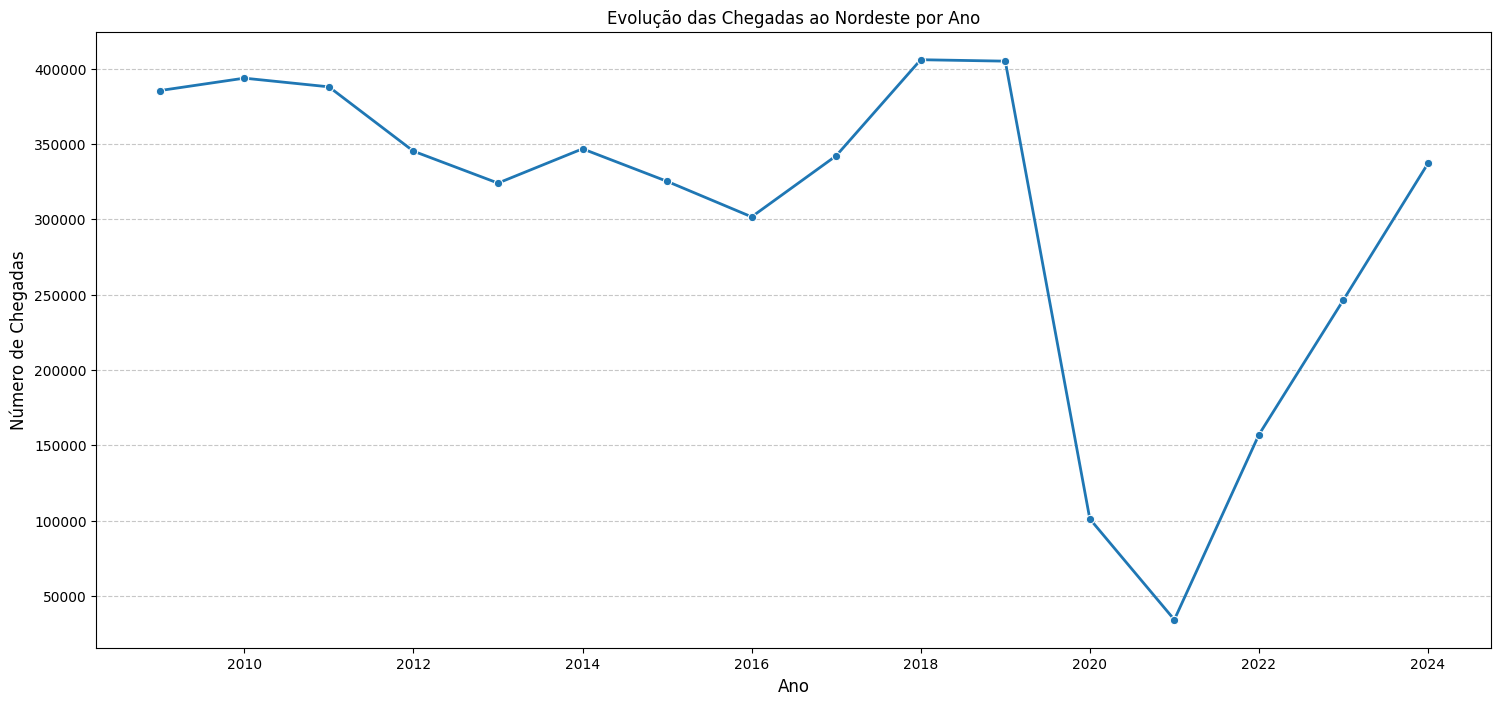

In [ ]:
# Agrupar os dados por ano e somar o n√∫mero total de chegadas
chegadas_por_ano = chegada_nordeste.groupby("Ano")["Chegadas"].sum().reset_index()

# Criar o gr√°fico de linhas
plt.figure(figsize=(18, 8))
sns.lineplot(data=chegadas_por_ano, x="Ano", y="Chegadas", marker="o", linewidth=2)

# Personaliza√ß√µes do gr√°fico
plt.title("Evolu√ß√£o das Chegadas ao Nordeste por Ano")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("N√∫mero de Chegadas", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gr√°fico
plt.show()

O gr√°fico "**Evolu√ß√£o das Chegadas ao Nordeste por Ano**" apresenta a evolu√ß√£o do n√∫mero de chegadas √† regi√£o Nordeste ao longo dos anos, especificamente nos anos pares de 2010 a 2024. Principais pontos observados:
* **Eixo X (Horizontal):** Representa os anos, come√ßando em 2010 e terminando em 2024, com intervalos de dois anos.
* **Eixo Y (Vertical):** Representa o n√∫mero de chegadas, que pode ser medido em unidades absolutas (como milhares ou milh√µes de pessoas, dependendo da escala).
* **Tend√™ncia:** O gr√°fico permite visualizar a tend√™ncia das chegadas ao longo do tempo, indicando se houve crescimento, decl√≠nio ou estabilidade no n√∫mero de chegadas com a passagem do tempo (em anos).

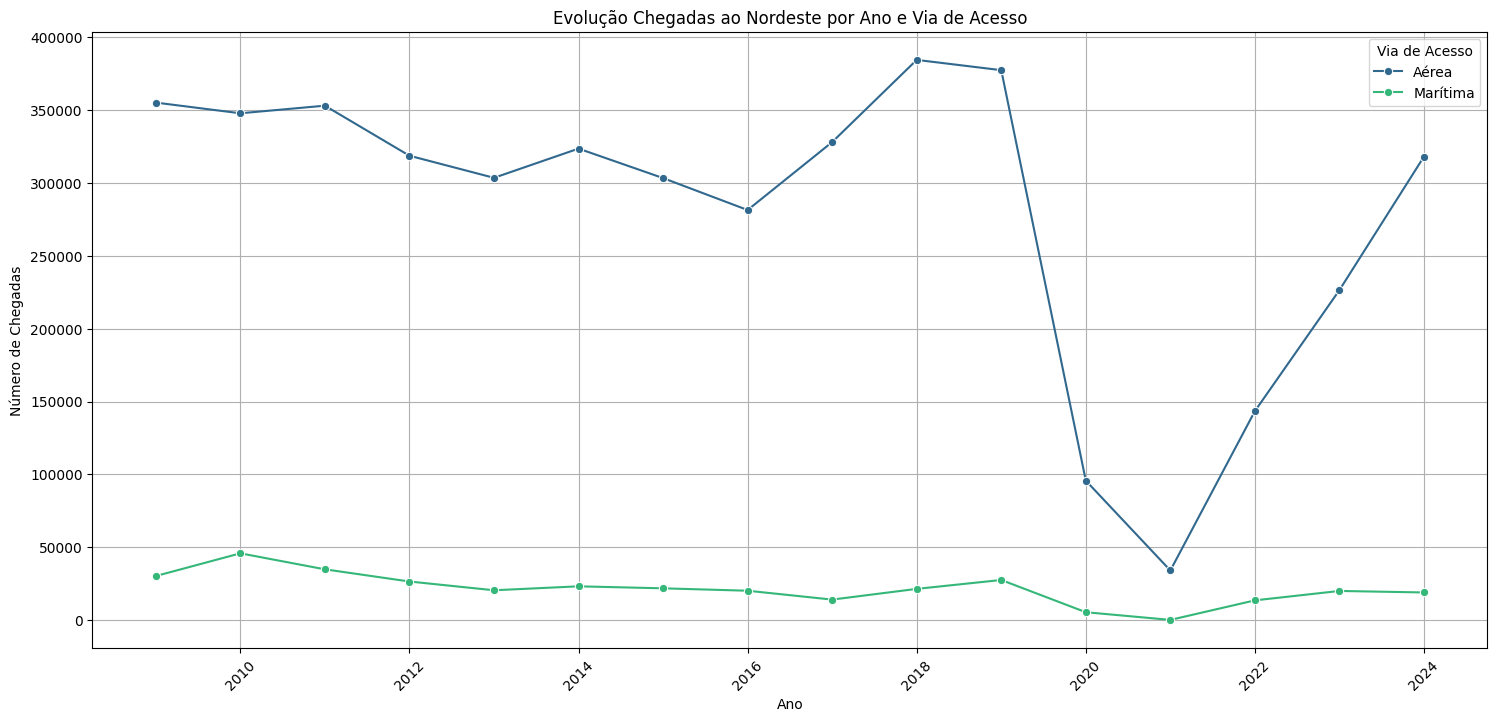

In [ ]:
# Agrupar os dados por 'Ano' e 'Via de acesso', somando as chegadas
chegadas_por_ano_via = chegada_nordeste.groupby(['Ano', 'Via de acesso'])['Chegadas'].sum().reset_index()

# Configurar o gr√°fico
plt.figure(figsize=(18, 8))
sns.lineplot(data=chegadas_por_ano_via, x='Ano', y='Chegadas', hue='Via de acesso', marker='o', palette='viridis')

# Ajustes no layout
plt.title("Evolu√ß√£o Chegadas ao Nordeste por Ano e Via de Acesso")
plt.xlabel("Ano")
plt.ylabel("N√∫mero de Chegadas")
plt.xticks(rotation=45)
plt.legend(title="Via de Acesso")
plt.grid(True)

# Exibir o gr√°fico
plt.show()

O gr√°fico de linhas "**Evolu√ß√£o das Chegadas ao Nordeste por Ano e Via de Acesso**" apresenta a evolu√ß√£o do n√∫mero de chegadas √† regi√£o Nordeste, diferenciando as chegadas por via de acesso (a√©rea e mar√≠tima) ao longo dos anos pares de 2010 a 2024. Principais pontos observados:
* **Eixo X (Horizontal):** Representa os anos, come√ßando em 2010 e terminando em 2024, com intervalos de dois anos.
* **Eixo Y (Vertical):** Representa o n√∫mero de chegadas, que pode ser medido em unidades absolutas (como milhares ou milh√µes de pessoas, dependendo da escala).
* **Diferencia√ß√£o por Via de Acesso:** O gr√°fico separa as chegadas em duas categorias:
  * **A√©rea:** Chegadas por meio de transporte a√©reo.
  * **Mar√≠tima:** Chegadas por meio de transporte mar√≠timo.

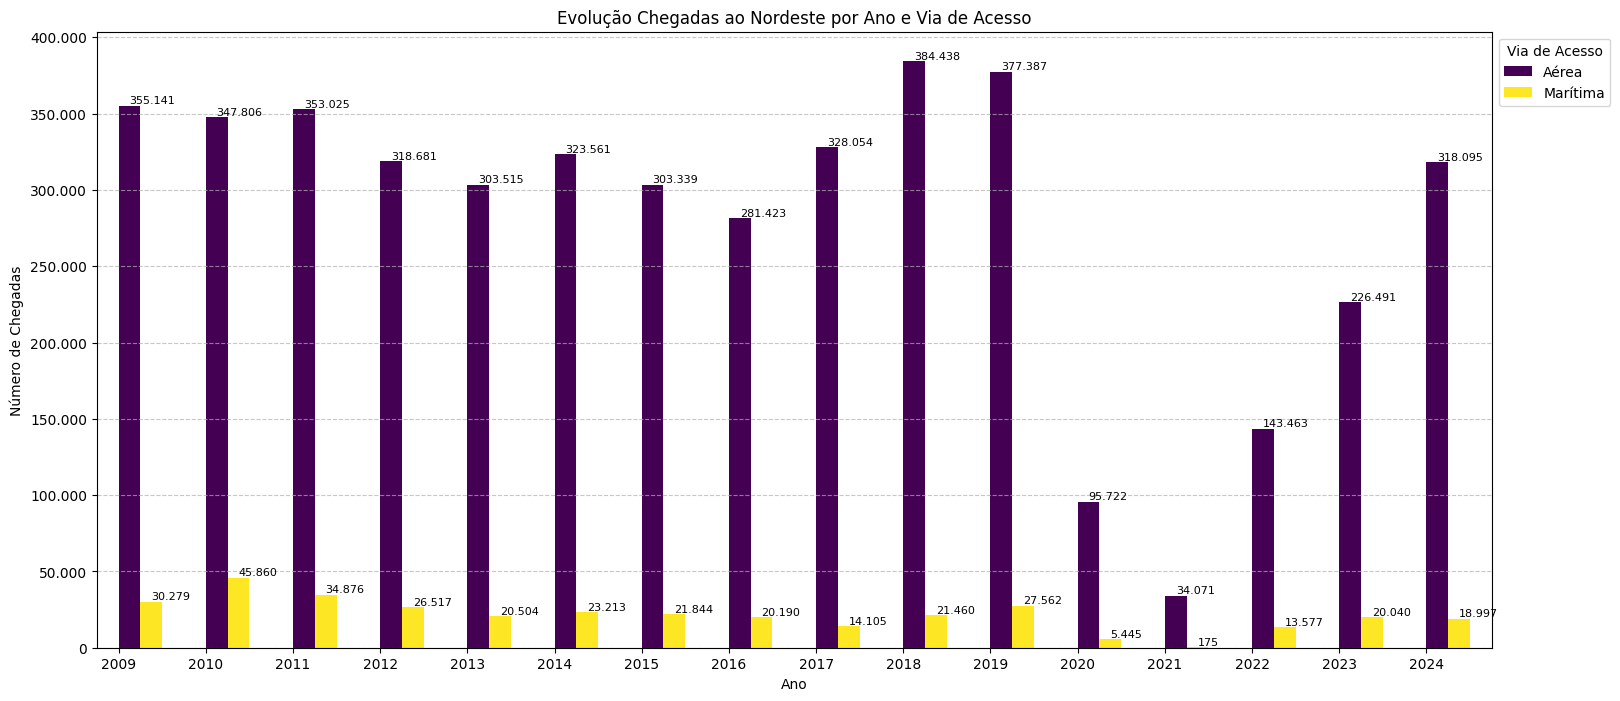

In [ ]:
# Agrupar os dados por 'Ano' e 'Via de acesso', somando as chegadas
# unstack() √© usado para reorganizar os dados, criando uma coluna para cada tipo de via de acesso. Isso √© necess√°rio para fazer um gr√°fico empilhado.
chegadas_por_ano_via = chegada_nordeste.groupby(['Ano', 'Via de acesso'])['Chegadas'].sum().unstack()

# Configurar o gr√°fico
ax = chegadas_por_ano_via.plot(kind='bar', stacked=False, colormap='viridis', figsize=(18, 8), align='edge')

# Ajustes no layout
ax.set_title("Evolu√ß√£o Chegadas ao Nordeste por Ano e Via de Acesso")
ax.set_xlabel("Ano")
ax.set_ylabel("N√∫mero de Chegadas")
ax.legend(title="Via de Acesso", bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)
# Ajustando os r√≥tulos do eixo X para ficarem na horizontal
ax.set_xticklabels(chegadas_por_ano_via.index, rotation=0)
# Adicionar valores no topo de cada barra
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 5,  # Posi√ß√£o do texto
             f'{int(p.get_height()):,}'.replace(",","."),  # Exibir valor formatado
             ha='left', va='bottom', fontsize=8)
# Formatando o eixo Y
# Define a fun√ß√£o formatar_quantidade para formatar os n√∫meros do eixo Y
def formatar_quantidade(x, pos):
    return f'{int(x):,}'.replace(',', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
plt.show()

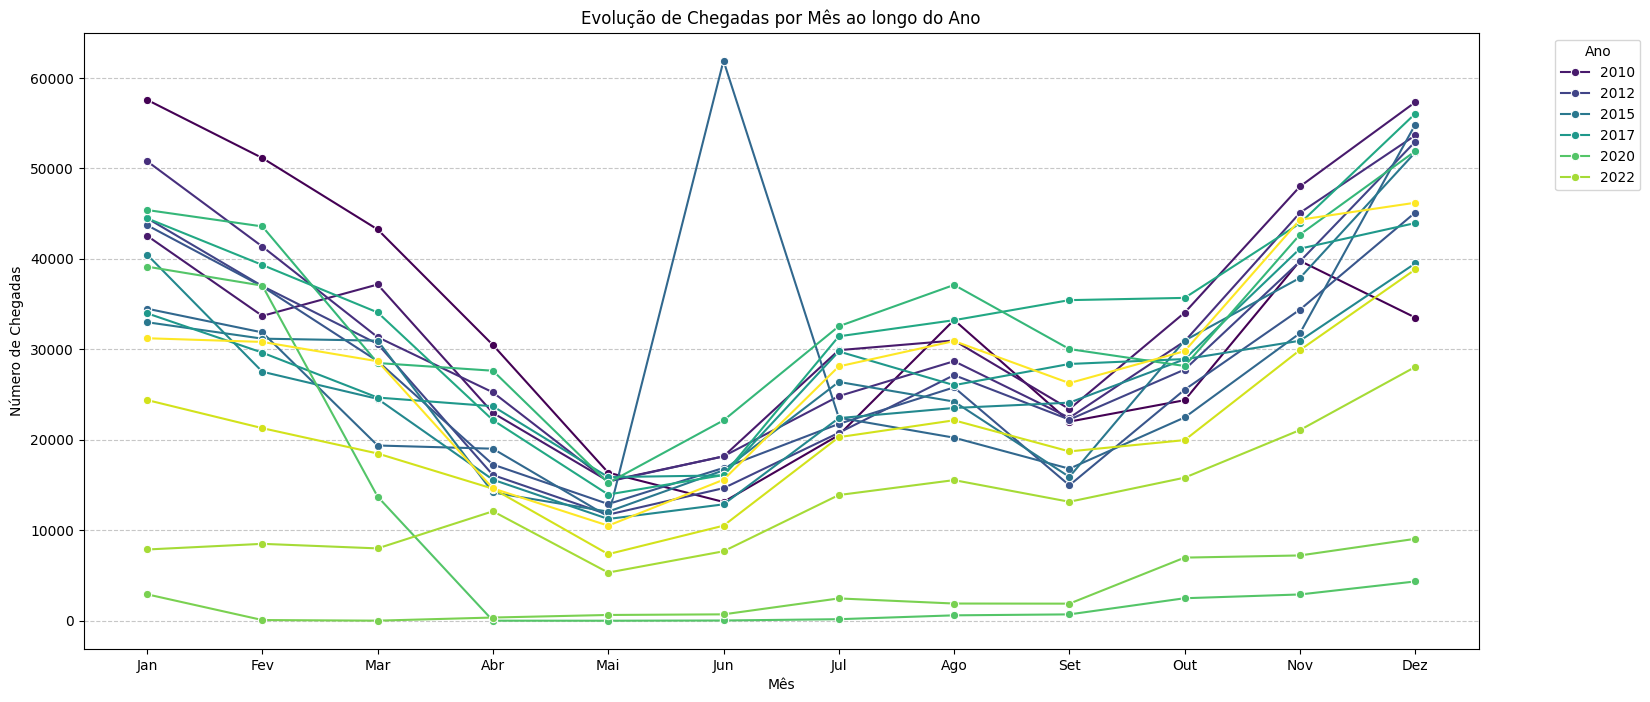

In [ ]:
# Agrupar os dados por 'Ano' e 'M√™s'
chegadas_mes_ano = chegada_nordeste.groupby(['Ano', 'M√™s'])['Chegadas'].sum().reset_index()

# Ordenar para evitar descontinuidade no gr√°fico
chegadas_mes_ano = chegadas_mes_ano.sort_values(by=['Ano', 'M√™s'])

# Configurar o gr√°fico
plt.figure(figsize=(18, 8))
sns.lineplot(data=chegadas_mes_ano, x='M√™s', y='Chegadas', hue='Ano', marker='o', palette="viridis")

# Ajustes no layout
plt.title("Evolu√ß√£o de Chegadas por M√™s ao longo do Ano")
plt.xlabel("M√™s")
plt.ylabel("N√∫mero de Chegadas")
plt.xticks(range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gr√°fico
plt.show()

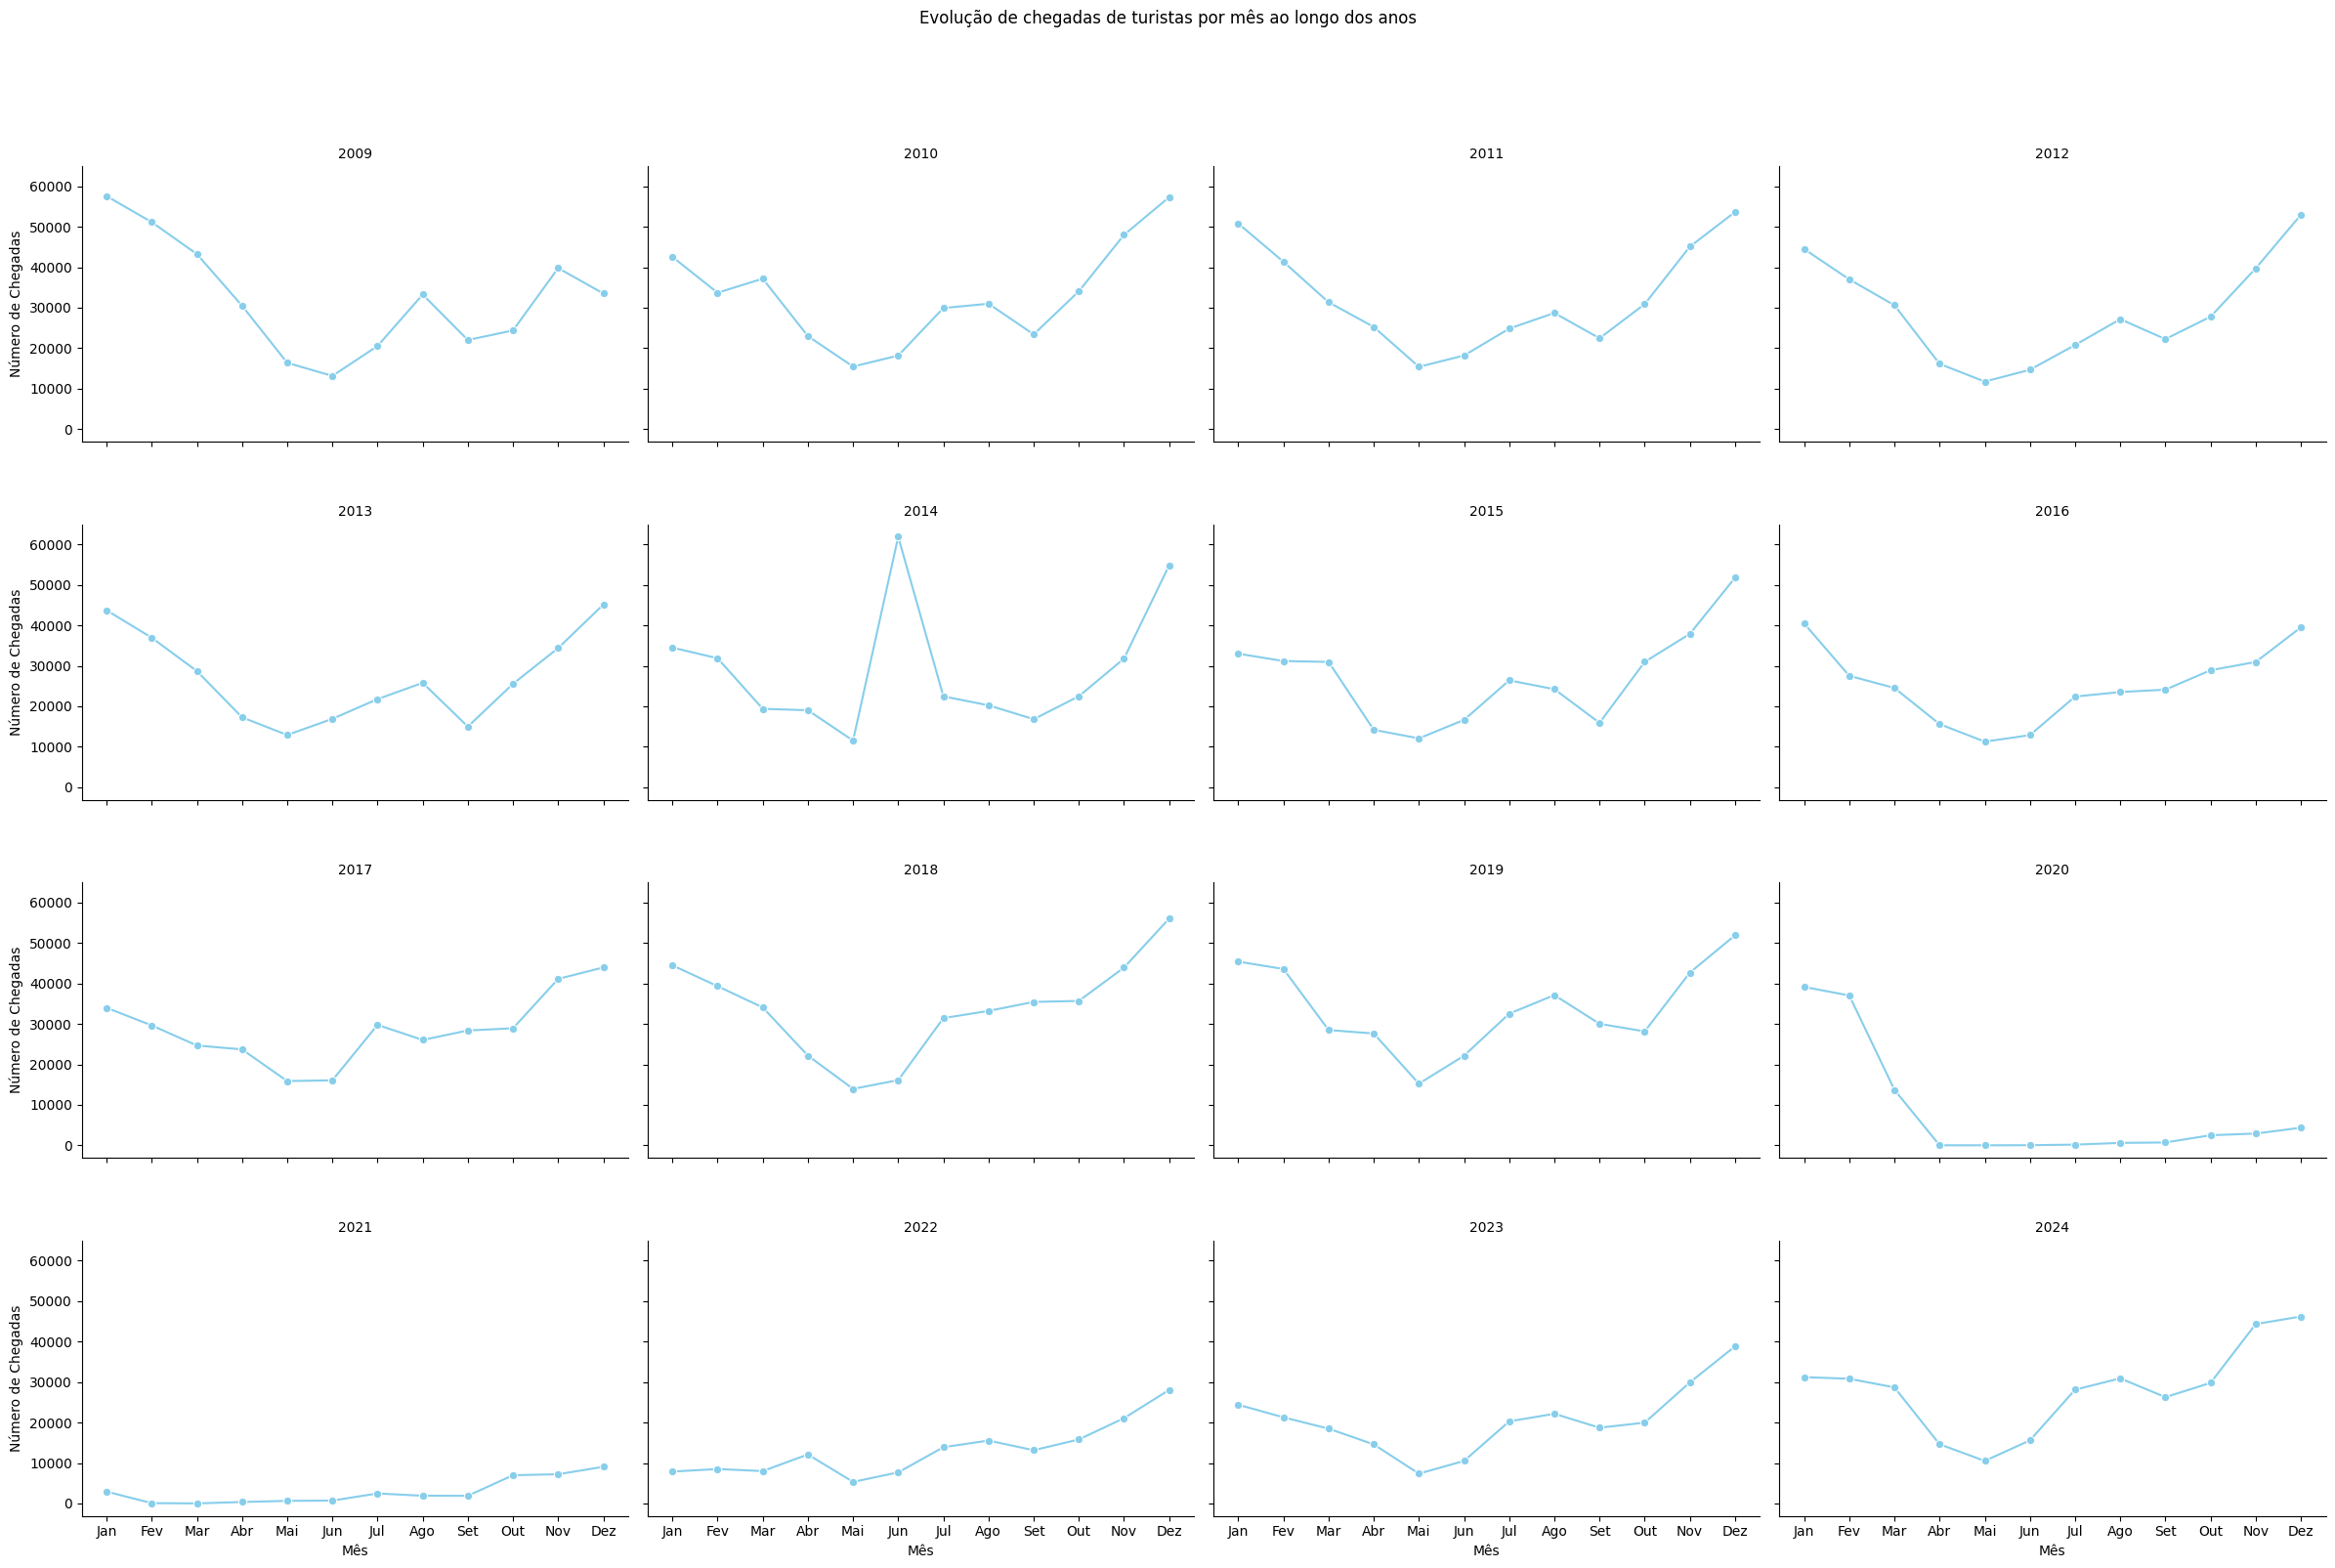

In [ ]:
# Agrupar os dados por 'Ano' e 'M√™s'
chegadas_mes_ano = chegada_nordeste.groupby(['Ano', 'M√™s'])['Chegadas'].sum().reset_index()

# Ordenar para evitar descontinuidade no gr√°fico
chegadas_mes_ano = chegadas_mes_ano.sort_values(by=['Ano', 'M√™s'])

# Configurar o gr√°fico de facetas
g = sns.FacetGrid(chegadas_mes_ano, col='Ano', col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, 'M√™s', 'Chegadas', marker='o', color='skyblue')

# Ajustes nos r√≥tulos e ticks
g.set_axis_labels("M√™s", "N√∫mero de Chegadas")
g.set(xticks=range(1, 13), xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
g.set_titles(col_template='{col_name}')  # Remove "Ano = "
g.fig.subplots_adjust(top=0.9, hspace=0.3)           # Ajusta o espa√ßo superior para aproximar os t√≠tulos
g.fig.suptitle("Evolu√ß√£o de chegadas de turistas por m√™s ao longo dos anos", y=1)
# Exibir o gr√°fico
plt.show()

O gr√°fico intitulado "**Evolu√ß√£o de Chegadas por M√™s ao longo do Ano**" apresenta a evolu√ß√£o do n√∫mero de chegadas √† regi√£o Nordeste, detalhando a distribui√ß√£o mensal ao longo de v√°rios anos (2010, 2012, 2015, 2017, 2020 e 2022). Principais pontos observados:
* **Eixo X (Horizontal):** Representa os meses do ano, de Janeiro (Jan) a Dezembro (Dec).
* **Eixo Y (Vertical):** Representa o n√∫mero de chegadas, que pode ser medido em unidades absolutas (como milhares ou milh√µes de pessoas, dependendo da escala).

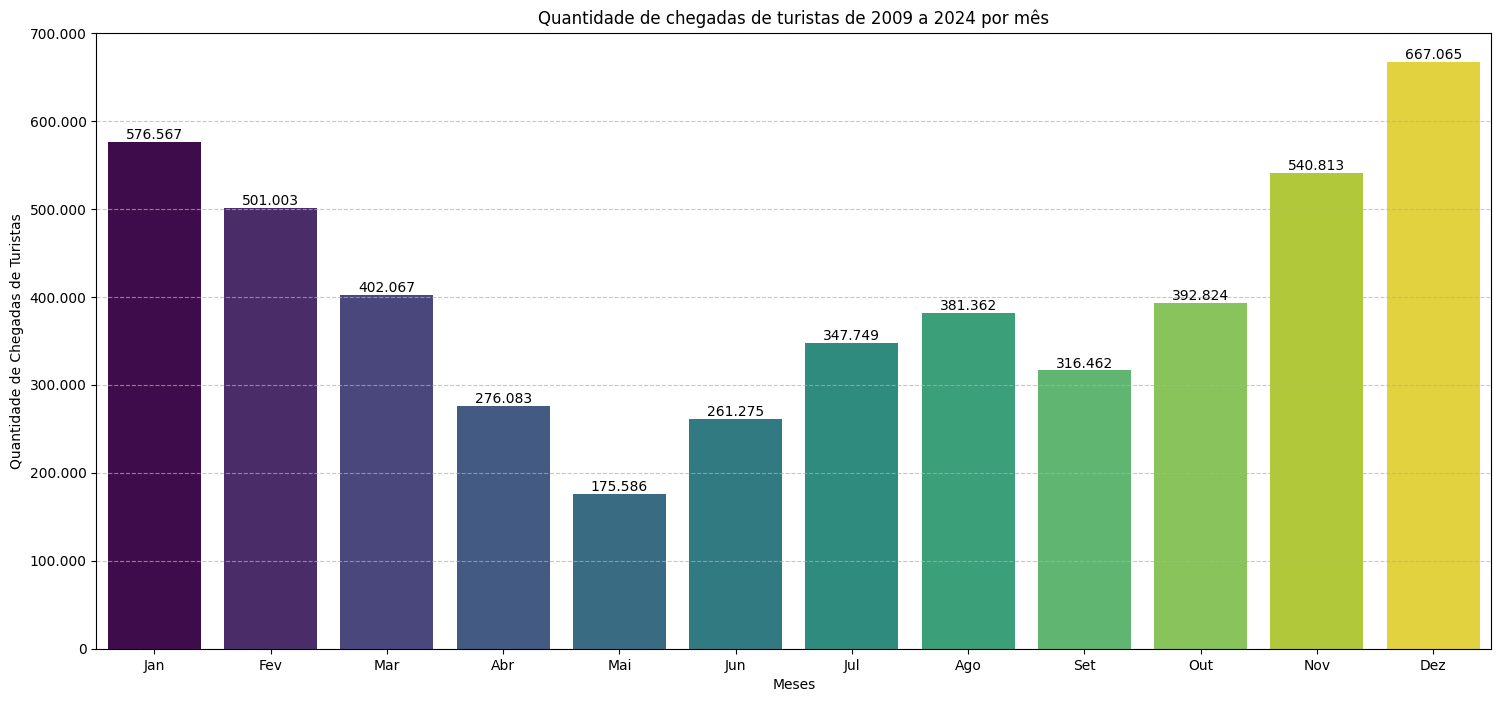

In [ ]:
# Agrupar chegadas por m√™s
chegadas_por_mes = chegada_nordeste.groupby("M√™s")["Chegadas"].sum().reset_index()

# Ordenar para evitar descontinuidade no gr√°fico
chegadas_mes_mes = chegadas_por_mes.sort_values(by=['M√™s'])

# Imprimir todos os anos do per√≠odo
anos_do_periodo = np.sort(chegada_nordeste['Ano'].unique())
primeiro_ano = anos_do_periodo[0]
ultimo_ano = anos_do_periodo[-1]
# Criar o gr√°fico de barras
fig = plt.figure(figsize=(18, 8))
sns.barplot(data=chegadas_por_mes, x="M√™s", y="Chegadas", hue="M√™s", palette="viridis", legend=False)
# Personaliza√ß√µes do gr√°fico
plt.title(f"Quantidade de chegadas de turistas de {primeiro_ano} a {ultimo_ano} por m√™s")
plt.xlabel("Meses")
plt.ylabel("Quantidade de Chegadas de Turistas")
plt.xticks(range(0, 12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
# Aplicar o formatador no eixo y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
# Adicionar valores no topo de cada barra
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 5,  # Posi√ß√£o do texto
             f'{int(p.get_height()):,}'.replace(",","."),  # Exibir valor formatado
             ha='center', va='bottom', fontsize=10)
# Adicionar grid no eixo y
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Exibir o gr√°fico
plt.show()

O gr√°fico "**N√∫mero de Chegadas de Turistas por M√™s**" apresenta a distribui√ß√£o mensal do n√∫mero de chegadas de turistas ao longo de um ano, com os valores variando de 0 a 600.000 chegadas. Principais pontos observados:
* **Eixo X (Horizontal):** Representa os meses do ano, de Janeiro (Jan) a Dezembro (Dez).
* **Eixo Y (Vertical):** Representa o n√∫mero de chegadas de turistas, variando de 0 a 600.000, com intervalos de 100.000.

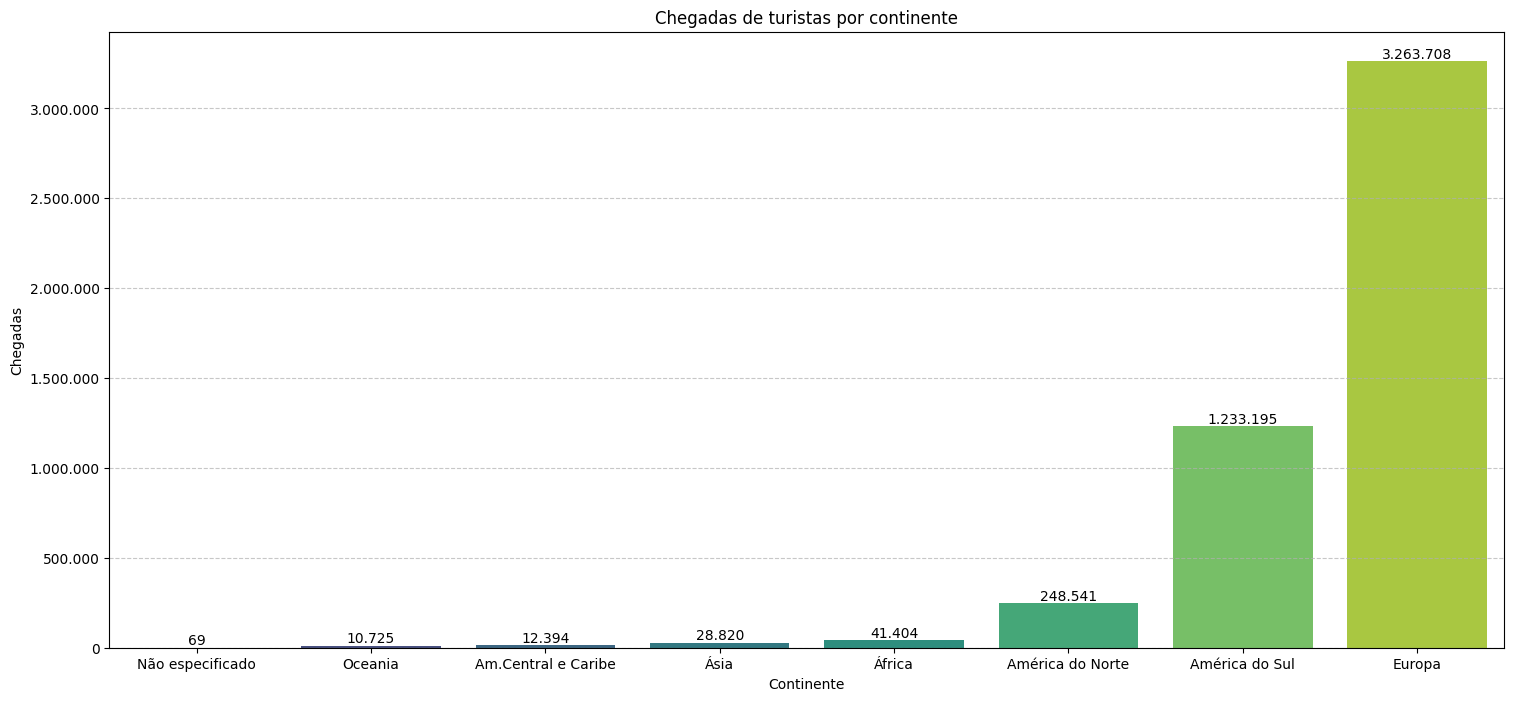

In [ ]:
# Modificar os r√≥tulos dos continentes
chegada_nordeste['Continente'] = chegada_nordeste['Continente'].replace({
    'Continente n√£o especificado': 'N√£o especificado',
    'Am√©rica Central e Caribe': 'Am.Central e Caribe'
})
# Agrupar chegadas por 'Continente'
chegadas_por_continente = chegada_nordeste.groupby('Continente')['Chegadas'].sum().reset_index()
# Ordenar em ordem crescente os valores por 'Chegadas'
chegadas_por_continente = chegadas_por_continente.sort_values(by=['Chegadas'])
# Configurar Gr√°fico
plt.figure(figsize=(18, 8))
sns.barplot(data=chegadas_por_continente, x="Continente", y="Chegadas", hue="Continente", palette="viridis", legend=False)
# Adicionar r√≥tulos em cada ponto
for x, y in zip(chegadas_por_continente['Continente'], chegadas_por_continente['Chegadas']):
    plt.text(x, y, f'{y:,}'.replace(",","."), color='black', ha='center', va='bottom', fontsize=10)
plt.title('Chegadas de turistas por continente')
plt.xlabel('Continente')
plt.ylabel('Chegadas')
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Aplicar o formatador no eixo y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
# Exibir Gr√°fico
plt.show()

O gr√°fico "**Chegadas de Turistas por Continente**" apresenta a distribui√ß√£o do n√∫mero de chegadas de turistas por continente. Principais pontos observados:
* **Eixo X (Horizontal):** Representa os continentes, incluindo:
  * √Åfrica;
  * Oceania;
  * Am√©rica Central e Caribe;
  * √Åsia;
  * Am√©rica do Norte;
  * Europa;
  * Am√©rica do Sul;
  * Continente n√£o especificado.
* **Eixo Y (Vertical):** Representa o n√∫mero de chegadas de turistas, indicando a varia√ß√£o no fluxo de turistas para cada continente.

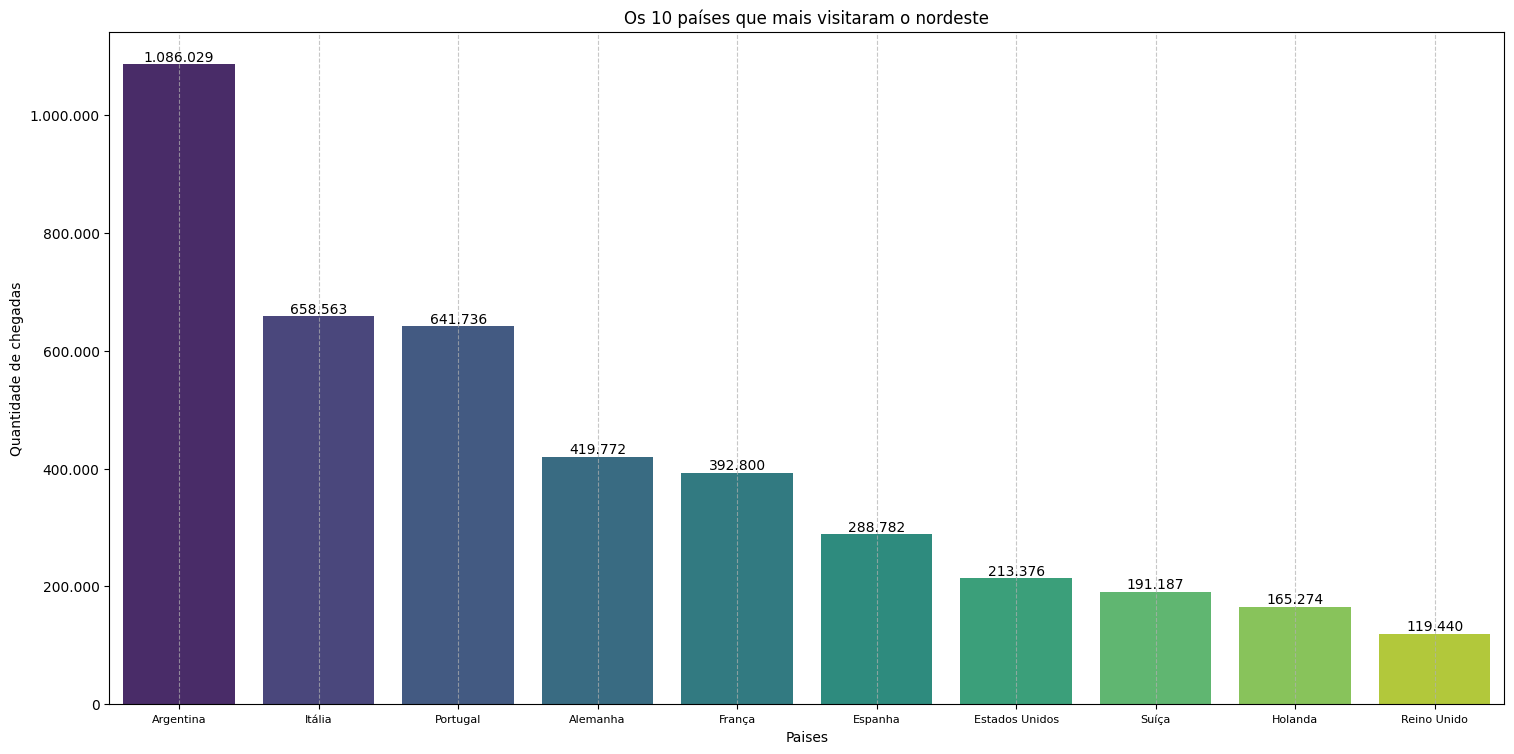

In [ ]:
# Selecionar os 10 pa√≠ses com mais chegadas
top_paises = chegada_nordeste.groupby("Pa√≠s")["Chegadas"].sum().nlargest(10).reset_index()
# Criar o gr√°fico de barras
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=top_paises, x="Pa√≠s", y="Chegadas", hue="Pa√≠s", palette="viridis")
# Personaliza√ß√µes do gr√°fico
plt.title("Os 10 pa√≠ses que mais visitaram o nordeste")
plt.xlabel("Paises",fontsize=10)
plt.ylabel("Quantidade de chegadas")
plt.grid(axis="x", linestyle="--", alpha=0.7)
# Adicionar r√≥tulos em cada ponto
for x, y in zip(top_paises['Pa√≠s'], top_paises['Chegadas']):
    plt.text(x, y, f'{y:,}'.replace(",","."), color='black', ha='center', va='bottom', fontsize=10)
# Formando eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
# Ajuste do tamanho da fonte dos r√≥tulos do eixo X
plt.xticks(fontsize=8)
# Margem superior
plt.subplots_adjust(top=0.95)
# Exibir o gr√°fico
plt.show()

O gr√°fico "**Top 10 Pa√≠ses que Mais Visitam o Nordeste**" apresenta uma lista dos pa√≠ses que mais enviam turistas para a regi√£o Nordeste do Brasil. Principais pontos observados:
* **Eixo X (Horizontal):** Apresenta os principais pa√≠ses emissores de turistas para o Nordeste.
* **Eixo Y (Vertical):** Representa o n√∫mero de chegadas de turistas.

# 5. Aplica√ß√£o de T√©cnicas de Aprendizado de M√°quina:
* Sele√ß√£o de Modelos: **RandomForest**.
* Treinamento e Valida√ß√£o do Modelo: Dividir os dados em conjuntos de treinamento e teste.

In [ ]:
# Aplicar One-Hot Encoding em todas as colunas categ√≥ricas
chegada_nordeste = pd.get_dummies(chegada_nordeste, columns=['Continente', 'Pa√≠s', 'UF', 'Via de acesso', 'Ano', 'M√™s'], dtype=float)

# Separar as vari√°veis independentes (X) e dependente (y)
X = chegada_nordeste.drop(columns=['Chegadas'])  # Features
y = chegada_nordeste['Chegadas']  # Target variable

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  * Treinar o modelo escolhido com os dados de treinamento e
validar sua efic√°cia com os dados de teste.

In [ ]:
# Criar o modelo Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Definir o espa√ßo de busca de hiperpar√¢metros
param_dist = {
    'n_estimators': np.arange(10, 201, 10),  # Intervalo de valores para n_estimators
    'max_depth': [None, 10, 20, 30],  # Valores para max_depth
    'min_samples_split': [2, 5, 10],  # Valores para min_samples_split
    'min_samples_leaf': [1, 2, 4]  # Valores para min_samples_leaf
}

# Aplicar RandomizedSearchCV com valida√ß√£o cruzada (3 folds para maior velocidade)
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=3,  # N√∫mero de combina√ß√µes aleat√≥rias a serem testadas
    cv=2,  # N√∫mero de folds na valida√ß√£o cruzada
    scoring='r2',  # M√©trica de avalia√ß√£o
    n_jobs=-1,  # Usar todos os n√∫cleos da CPU
    verbose=2,  # Mostrar progresso
    random_state=42
)

# Treinar o modelo com RandomizedSearchCV
random_search.fit(X_train, y_train)

# Melhor valor de n_estimators encontrado
best_params = random_search.best_params_
print(f"Melhores hiperpar√¢metros encontrados: {best_params}")

# Treinar o modelo final com os melhores hiperpar√¢metros
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Fazer previs√µes no conjunto de teste
y_pred = best_model.predict(X_test)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Melhores hiperpar√¢metros encontrados: {'n_estimators': np.int64(160), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


* Avalia√ß√£o do Modelo: Utilizar m√©tricas apropriadas (ex.: RMSE, R¬≤) para avaliar a performance do modelo.

In [ ]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erro Quadr√°tico M√©dio (MSE): {mse:.2f}")
print(f"Coeficiente de Determina√ß√£o (R¬≤): {r2:.2f}")

Erro Quadr√°tico M√©dio (MSE): 20653.58
Coeficiente de Determina√ß√£o (R¬≤): 0.72


**Explica√ß√£o dos Resultados**
* **Erro Quadr√°tico M√©dio (MSE):** Mede o erro m√©dio das previs√µes. Quanto menor o MSE, melhor o modelo est√° ajustado, pois indica que os erros (diferen√ßa entre valores reais e previstos) s√£o menores.
* **Coeficiente de Determina√ß√£o (R¬≤):** Mede a propor√ß√£o da vari√¢ncia nos dados que √© explicada pelo modelo. Varia de 0 a 1. Quanto mais pr√≥ximo de 1, melhor o modelo em termos de explica√ß√£o dos dados.

# 6. Interpreta√ß√£o dos Resultados:
* An√°lise dos Resultados:
  * Interpretar os resultados obtidos e entender o que os
modelos est√£o revelando sobre o fluxo de turistas e os
fatores que influenciam a visita√ß√£o.
  * Identificar insights significativos e tend√™ncias relevantes.


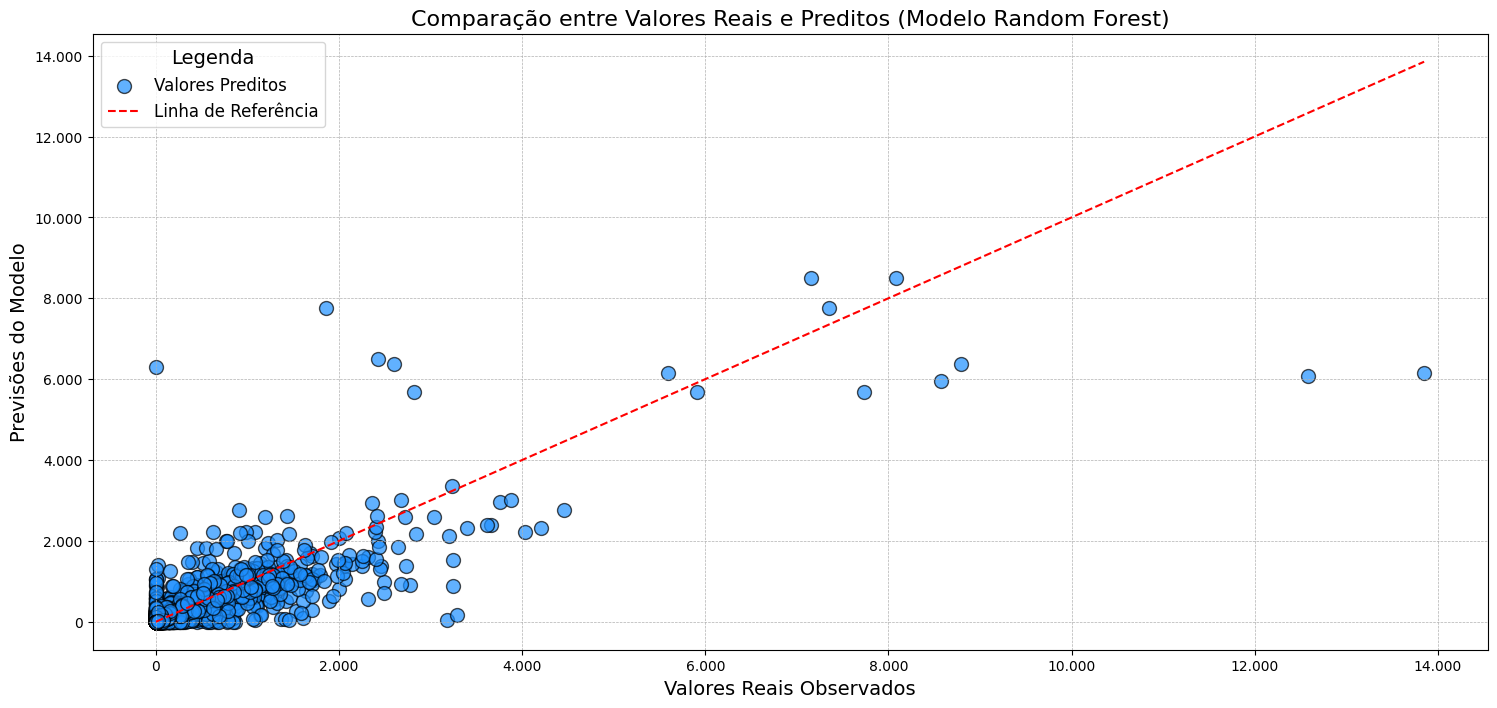

In [ ]:
plt.figure(figsize=(18, 8))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7, s=100, edgecolor='black', label='Valores Preditos')
# Formatando o eixo X e Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha de Refer√™ncia')
plt.xlabel('Valores Reais Observados', fontsize=14)
plt.ylabel('Previs√µes do Modelo', fontsize=14)
plt.title('Compara√ß√£o entre Valores Reais e Preditos (Modelo Random Forest)',fontsize=16)
# Adicionando grids para facilitar a leitura
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Ajustando a posi√ß√£o da legenda
plt.legend(loc='upper left', fontsize=12, title="Legenda", title_fontsize=14)
plt.show()

Este gr√°fico "**Valores Reais vs. Preditos (Random Forest)**" e ilustra a rela√ß√£o entre os valores reais e os valores previstos por um modelo de Random Forest. Elementos principais do gr√°fico:
* **Eixo X (Valores Reais):** Representa os valores observados (reais) do conjunto de dados.
* **Eixo Y (Valores Preditos):** Representa os valores que o modelo de Random Forest previu.
* **Pontos azuis:** Cada ponto reflete uma observa√ß√£o no conjunto de dados, comparando o valor real (no eixo X) com o valor predito (no eixo Y).
* **Linha de refer√™ncia (vermelha, pontilhada):** Indica a linha ideal onde os valores previstos seriam exatamente iguais aos reais (ùë¶=ùë•).

**An√°lise:** Boa performance: Os pontos mais pr√≥ximos da linha vermelha indicam previs√µes precisas do modelo, ou seja, o valor predito est√° pr√≥ximo do valor real.

**Desvios:** Pontos afastados da linha vermelha revelam discrep√¢ncias entre os valores reais e previstos. No entanto, observa-se que essas discrep√¢ncias aumentam, especialmente para valores maiores.

In [ ]:
# Converter Chegadas em classes (0 = Baixa, 1 = Alta)
y_test_class = np.where(y_test > 800, 1, 0)
y_pred_class = np.where(y_pred > 800, 1, 0)

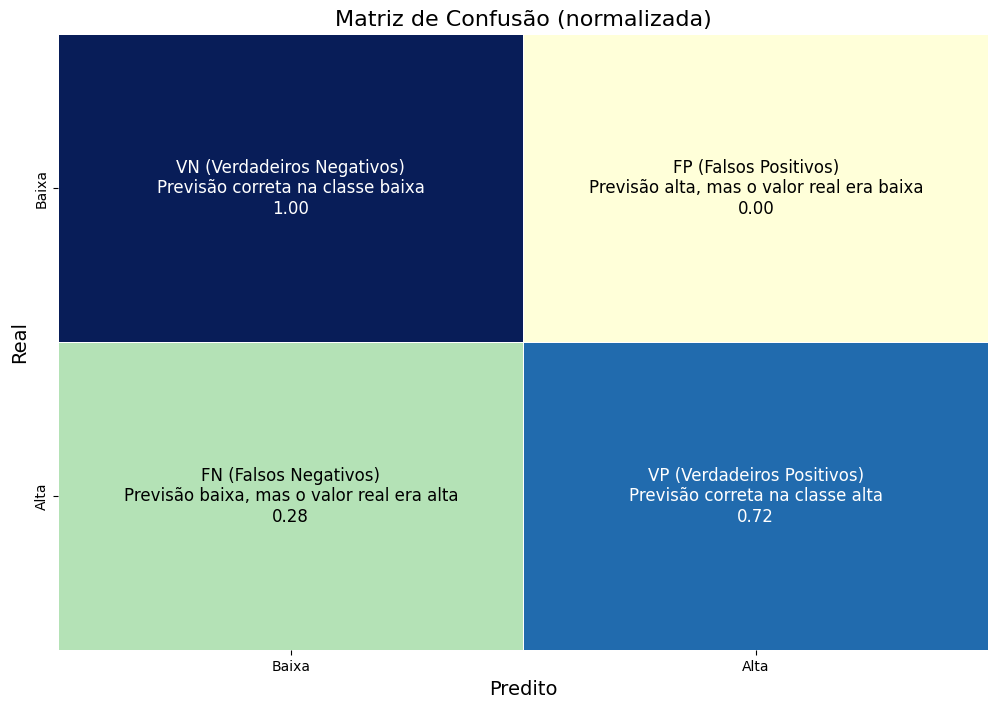

In [ ]:
# Calcular a matriz de confus√£o
cm = confusion_matrix(y_test_class, y_pred_class)
# Normalizando a matriz de confus√£o
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plotar a matriz de confus√£o
#plt.figure(figsize=(8, 6))
plt.figure(figsize=(12, 8))
sns_heatmap = sns.heatmap(cm_normalized, annot=False, cmap='YlGnBu', cbar=False,
                         xticklabels=['Baixa', 'Alta'], yticklabels=['Baixa', 'Alta'],
                         linewidths=0.5)
# Definir as etiquetas e concatenar com os valores num√©ricos
# Criar uma matriz com os textos 'VP', 'FP', 'FN', 'VN' e os valores num√©ricos
for i in range(2):
    for j in range(2):
        # Obter o valor num√©rico da c√©lula
        value = cm_normalized[i, j]
        # Identificar os r√≥tulos de cada c√©lula
        if i == 0 and j == 0:
            label1 = 'VN (Verdadeiros Negativos)'
            label2 = 'Previs√£o correta na classe baixa'
        elif i == 0 and j == 1:
            label1 = 'FP (Falsos Positivos)'
            label2 = 'Previs√£o alta, mas o valor real era baixa'
        elif i == 1 and j == 0:
            label1 = 'FN (Falsos Negativos)'
            label2 = 'Previs√£o baixa, mas o valor real era alta'
        elif i == 1 and j == 1:
            label1 = 'VP (Verdadeiros Positivos)'
            label2 = 'Previs√£o correta na classe alta'
        # Definir o texto a ser exibido (etiqueta e valor)
        text_value = f"{value:.2f}"
        # Ajustando a cor do texto com base no valor da c√©lula (para contraste)
        if value < 0.5:  # Para valores mais baixos (geralmente mais escuros)
            text_color = 'black'  # Cor clara para maior contraste
        else:  # Para valores mais altos (geralmente mais claros)
            text_color = 'white'  # Cor escura para maior contraste
        # Colocar a etiqueta e o valor num√©rico dentro da c√©lula
        # Offset adicional para centralizar o texto
        plt.text(j + 0.5, i + 0.5, f"{label1}\n{label2}\n{text_value}", ha='center', va='center', fontsize=12, color=text_color)
plt.xlabel('Predito', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.title('Matriz de Confus√£o (normalizada)', fontsize=16)
plt.show()

A Matriz de Confus√£o √© uma ferramenta utilizada para avaliar o desempenho de um modelo de classifica√ß√£o. Ela compara as previs√µes do modelo com os valores reais (ou verdadeiros) e organiza os resultados em quatro categorias:
* **Estrutura da Matriz de Confus√£o:**
  * Valores Reais (Real):
    * Baixa: Representa os casos em que o valor real era "Baixa".
    * Alta: Representa os casos em que o valor real era "Alta".
  * Valores Previstos (Previsto):
    * Baixa: Representa os casos em que o modelo previu "Baixa".
    * Alta: Representa os casos em que o modelo previu "Alta".
* **C√©lulas da Matriz:**
  * Verdadeiros Positivos (VP): Casos em que o modelo previu corretamente a classe "Alta". Neste caso: 212.
  * Falsos Positivos (FP): Casos em que o modelo previu "Alta", mas o valor real era "Baixa". Neste caso: 83.
  * Verdadeiros Negativos (VN): Casos em que o modelo previu corretamente a classe "Baixa". Neste caso: 22221.
  * Falsos Negativos (FN): Casos em que o modelo previu "Baixa", mas o valor real era "Alta". Neste caso: 75.

  A matriz de confus√£o mostra que o modelo tem um desempenho geral muito bom, com uma alta acur√°cia de aproximadamente 99.3%. Em resumo, o modelo √© eficaz para prever a classe "Baixa", mas pode precisar de ajustes para melhorar a previs√£o da classe "Alta". Isso pode envolver a coleta de mais dados, o balanceamento das classes ou a escolha de um modelo mais adequado. Em resumo, o modelo √© eficaz para prever a classe "Baixa", mas pode precisar de ajustes para melhorar a previs√£o da classe "Alta". Isso pode envolver a coleta de mais dados, o balanceamento das classes ou a escolha de um modelo mais adequado.

In [ ]:
# Calculando as m√©tricas de classifica√ß√£o usando as classes convertidas
accuracy = accuracy_score(y_test_class, y_pred_class)     #Acur√°ria: propor√ß√£o de previs√µes corretas sobre o total de previs√µes
precision = precision_score(y_test_class, y_pred_class)   #Precis√£o: propor√ß√£o de verdadeiros positivos sobre o total de elementos classificados como positivos
recall = recall_score(y_test_class, y_pred_class)         #Recall: propor√ß√£o de verdadeiros positivos sobre o total de elementos que realmente s√£o positivos
f1 = f1_score(y_test_class, y_pred_class)                 #F1-score: m√©dia harm√¥nica entre precis√£o e recall
roc_auc = roc_auc_score(y_test_class, y_pred_class)       #Curva ROC (Receiver Operating Characteristic): avalia a capacidade do modelo de distinguir entre classes #This line needs to be modified since y_pred_class doesn't have probability

print(f'Acur√°cia: {accuracy:.2f}')
print(f'Precis√£o: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Curva ROC: {roc_auc}')

Acur√°cia: 0.99
Precis√£o: 0.73
Recall: 0.72
F1-score: 0.72
Curva ROC: 0.8561053324462613


* **M√©tricas de Avalia√ß√£o**
  * A **acur√°cia** mede a propor√ß√£o de previs√µes corretas (tanto positivas quanto negativas) em rela√ß√£o ao total de previs√µes.
  * A **precis√£o** mede a propor√ß√£o de previs√µes positivas corretas em rela√ß√£o ao total de previs√µes positivas feitas pelo modelo.
  * O **recall** (ou sensibilidade) mede a propor√ß√£o de casos positivos reais que foram corretamente identificados pelo modelo.
  * O **F1-score** √© a m√©dia harm√¥nica entre precis√£o e recall, equilibrando as duas m√©tricas.
  * A **curva ROC** (Receiver Operating Characteristic) mede a capacidade do modelo de distinguir entre as classes. A √°rea sob a curva (AUC) varia de 0 a 1, onde 1 representa um modelo perfeito.

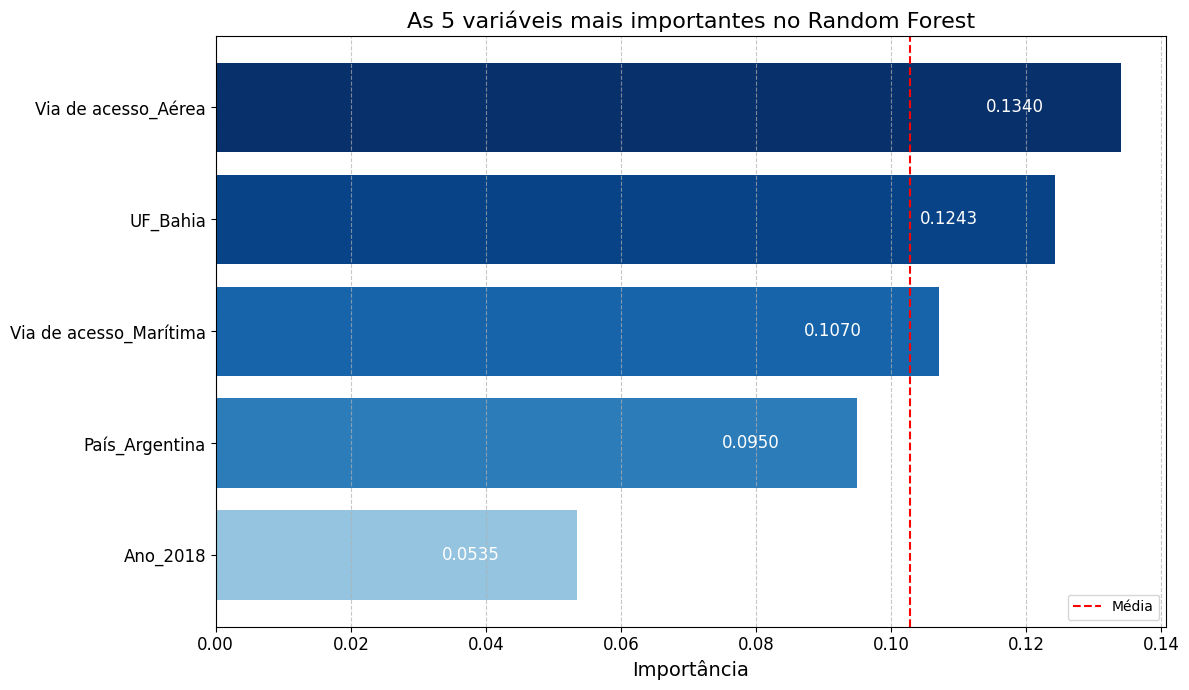

In [ ]:
# Analisar a import√¢ncia das vari√°veis
importances = best_model.feature_importances_
feature_names = X.columns
# Criar um DataFrame para visualiza√ß√£o
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Selecionar apenas as 5 vari√°veis mais importantes
top_5_importance_df = importance_df.head(5)
# Plotar a import√¢ncia das 5 vari√°veis mais importantes
plt.figure(figsize=(12, 7))
#bars = plt.barh(top_5_importance_df['Feature'], top_5_importance_df['Importance'], color='skyblue')
# Usar uma colora√ß√£o gradiente para as barras
bars = plt.barh(top_5_importance_df['Feature'], top_5_importance_df['Importance'], color=plt.cm.Blues(top_5_importance_df['Importance'] / max(top_5_importance_df['Importance'])))
# Adicionar r√≥tulos nas barras
for bar in bars:
    plt.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}', va='center', ha='left', color='white', fontsize=12)
# Adicionar uma linha de base no gr√°fico (m√©dia das import√¢ncias)
plt.axvline(x=top_5_importance_df['Importance'].mean(), color='red', linestyle='--', label='M√©dia')
plt.xlabel('Import√¢ncia', fontsize=14)
plt.title('As 5 vari√°veis mais importantes no Random Forest', fontsize=16)
plt.gca().invert_yaxis()  # Inverter o eixo Y para exibir a mais importante no topo
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Grade no eixo X
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Exibir a legenda para a linha de m√©dia
plt.legend()
# Exibir o gr√°fico
plt.tight_layout()
plt.show()

O gr√°fico "**Top 5 Vari√°veis Mais Importantes no Random Forest**" apresenta as cinco vari√°veis mais relevantes para o modelo *Random Forest* na tomada de decis√£o do modelo.